In [129]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from census import Census
import seaborn as sns
import numpy as np

# Census API Key
from config import api_key
c = Census(api_key, year = 2013)


In [130]:
# Store filepath in a variable
gun_file = "Resources/gun-violence-data_01-2013_03-2018.csv"

In [131]:
# Read our data file with the pandas library
gun_file_df = pd.read_csv(gun_file)
gun_file_df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,1/1/13,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,1/1/13,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,1/1/13,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,1/5/13,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,1/7/13,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [132]:
# Create a new series for just the year
gun_file_df["year"] = pd.DatetimeIndex(gun_file_df["date"]).year
gun_file_df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,year
0,461105,1/1/13,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,2013
1,460726,1/1/13,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,2013
2,478855,1/1/13,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,2013
3,478925,1/5/13,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,2013
4,478959,1/7/13,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,2013


In [133]:
# Group dataframe by state
grouped_states = gun_file_df.groupby(["state"])
number_of_incidents = grouped_states.count()
incidents = number_of_incidents["incident_id"]
incidents.head()

state
Alabama        5471
Alaska         1349
Arizona        2328
Arkansas       2842
California    16306
Name: incident_id, dtype: int64

In [134]:
# Find the total number killed by state
sum_of_deaths = grouped_states["n_killed"].sum()
sum_of_deaths.head()

state
Alabama       1880
Alaska         267
Arizona       1094
Arkansas       773
California    5562
Name: n_killed, dtype: int64

In [135]:
# Create a new dataframe
state_summary = pd.DataFrame({"Number of Incidents" : incidents,
                             "Number of Deaths" : sum_of_deaths})
#state_summary = state_summary.reset_index(drop=True)
state_summary.head()

,Number of Deaths,Number of Incidents
state,,
Alabama,1880,5471
Alaska,267,1349
Arizona,1094,2328
Arkansas,773,2842
California,5562,16306


In [136]:
# Add state as a column
state_summary["State_Name"] = state_summary.index
state_summary.head()

,Number of Deaths,Number of Incidents,State_Name
state,,,
Alabama,1880,5471,Alabama
Alaska,267,1349,Alaska
Arizona,1094,2328,Arizona
Arkansas,773,2842,Arkansas
California,5562,16306,California


In [137]:
# Reset index
state_summary = state_summary.reset_index(drop=True)
state_summary.head()

,Number of Deaths,Number of Incidents,State_Name
0,1880,5471,Alabama
1,267,1349,Alaska
2,1094,2328,Arizona
3,773,2842,Arkansas
4,5562,16306,California


In [138]:
# Look at gun violence over time to show there is a need to study this
# Group dataframe by year

grouped_years = gun_file_df.groupby(["year"])
incidents_in_years = grouped_years.count()
incidents_years = incidents_in_years["incident_id"]
incidents_years



year
2013      278
2014    51854
2015    53579
2016    58763
2017    61401
2018    13802
Name: incident_id, dtype: int64

In [139]:
# Find the total number killed by year
sum_of_deaths_year = grouped_years["n_killed"].sum()
sum_of_deaths_year

year
2013      317
2014    12557
2015    13484
2016    15066
2017    15511
2018     3533
Name: n_killed, dtype: int64

In [140]:
# Create a new dataframe with years
year_df = pd.DataFrame({
                        "Number of Incidents" : incidents_years,
                        "Number of Deaths": sum_of_deaths_year})
year_df

,Number of Deaths,Number of Incidents
year,,
2013,317,278
2014,12557,51854
2015,13484,53579
2016,15066,58763
2017,15511,61401
2018,3533,13802


In [141]:
# Add year as a column
year_df["Year"] = year_df.index
year_df

,Number of Deaths,Number of Incidents,Year
year,,,
2013,317,278,2013
2014,12557,51854,2014
2015,13484,53579,2015
2016,15066,58763,2016
2017,15511,61401,2017
2018,3533,13802,2018


In [142]:
# Reset index
year_df = year_df.reset_index(drop=True)
year_df

,Number of Deaths,Number of Incidents,Year
0,317,278,2013
1,12557,51854,2014
2,13484,53579,2015
3,15066,58763,2016
4,15511,61401,2017
5,3533,13802,2018


In [143]:
# Drop 2013 and 2018 for the purpose of the line graph
only_few_years = year_df.drop([0,5])
only_few_years

,Number of Deaths,Number of Incidents,Year
1,12557,51854,2014
2,13484,53579,2015
3,15066,58763,2016
4,15511,61401,2017


In [ ]:
# Create a new dataframe Divide the number of deaths and incidents by 10000
# new_deaths = only_few_years["Number of Deaths"]/10000
# new_instances = only_few_years["Number of Incidents"]/10000


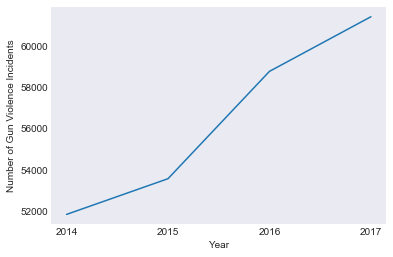

In [144]:
# Create a line plot for number of incidents by year
x_axis = only_few_years["Year"]
y_axis_incidents = only_few_years["Number of Incidents"]


# Format the graph
plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 1.0))
plt.xlabel("Year")
plt.ylabel("Number of Gun Violence Incidents")
plt.plot(x_axis, y_axis_incidents)
#sns.despine()
sns.set_style("dark")




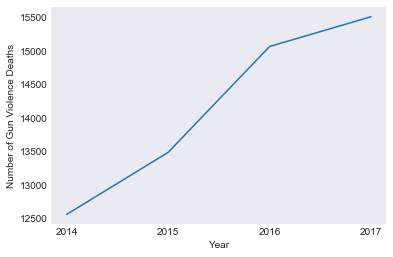

In [145]:
# Create a line plot for deaths by year
x_axis = only_few_years["Year"]
y_axis_deaths = only_few_years["Number of Deaths"]

# Format the graph
plt.xticks(np.arange(min(x_axis), max(x_axis) + 1, 1.0))
plt.xlabel("Year")
plt.ylabel("Number of Gun Violence Deaths")
plt.plot(x_axis, y_axis_deaths)
sns.set_style("dark")

In [ ]:
# Create a stacked bar plot for states with incidents and deaths
# population divided by incidents
                      

In [146]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_005E"), {'for': 'state:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "NAME": "State_Name"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_pd["Unemployment Rate"] = 100 * \
    census_pd["Unemployment Count"].astype(
        int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["State_Name", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate"]]

census_pd.head()

,State_Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,Alabama,4799277.0,38.1,43253.0,23680.0,870631.0,18.140878,5.040968
1,Alaska,720316.0,33.6,70760.0,32651.0,69514.0,9.650487,4.572854
2,Arizona,6479703.0,36.3,49774.0,25358.0,1131901.0,17.468409,4.882323
3,Arkansas,2933369.0,37.5,40768.0,22170.0,547328.0,18.658682,4.132961
4,California,37659181.0,35.4,61094.0,29527.0,5885417.0,15.628107,5.758662


In [147]:
# Merge data frames on state (state_summary) and (census_pd)
merge_summary_census = pd.merge(state_summary, census_pd, on = "State_Name")
merge_summary_census.head()


,Number of Deaths,Number of Incidents,State_Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,1880,5471,Alabama,4799277.0,38.1,43253.0,23680.0,870631.0,18.140878,5.040968
1,267,1349,Alaska,720316.0,33.6,70760.0,32651.0,69514.0,9.650487,4.572854
2,1094,2328,Arizona,6479703.0,36.3,49774.0,25358.0,1131901.0,17.468409,4.882323
3,773,2842,Arkansas,2933369.0,37.5,40768.0,22170.0,547328.0,18.658682,4.132961
4,5562,16306,California,37659181.0,35.4,61094.0,29527.0,5885417.0,15.628107,5.758662


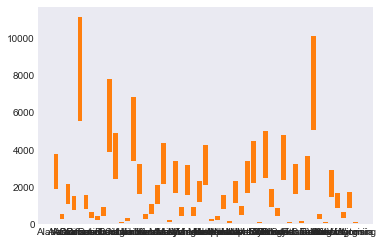

In [148]:
# Create a stacked bar plot for each state's just_letter rank and median age
x_axis = merge_summary_census["State_Name"]
one_y_axis = merge_summary_census["Unemployment Rate"]
two_y_axis = merge_summary_census["Number of Deaths"]

p1 = plt.bar(x_axis, one_y_axis)
p2 = plt.bar(x_axis, two_y_axis, bottom=two_y_axis)

In [149]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
census_pd.to_csv("census_data_states.csv", encoding="utf-8", index=False)

In [150]:
# Store filepath in a variable
gun_law = "Resources/Gun Law Strictness.xlsx"
gun_school = "Resources/Total School Expenditures by State.xlsx"
gun_mental = "Resources/Mental Health Expenditure by State.xlsx"
gun_raw = "Resources/raw_data.xlsx"

In [151]:
# Read our data file with the pandas library
gun_law_df = pd.read_excel(gun_law)
gun_school_df = pd.read_excel(gun_school)
gun_mental_df = pd.read_excel(gun_mental)
gun_raw_df = pd.read_excel(gun_raw)

gun_mental_df.head()

,state,tota_expenditure,expenditure_per_capita,per_capita_rank,poverty_per_capita_expenditure,poverty_per_capita_rank
0,Alabama,373100000,78.19,37,327.57,40
1,Alaska,214200700,310.01,3,1785.01,2
2,Arizona,1414300000,221.27,7,827.56,15
3,Arkansas,122468795,42.02,48,169.39,50
4,California,5674396088,152.60,15,645.55,22


In [152]:
gun_law_df.head()

,gun law strengh (rank),state,grade (2017),gun death rate (rank),gun death rate (rank per 100k)
0,1,California,A,43,7.9
1,2,New Jersey,A-,45,5.5
2,3,Connecticut,A-,46,4.6
3,4,Massachusetts,A-,50,3.4
4,5,New York,A-,48,4.4


In [153]:
# Create a for loop to just pull the letter with + or -
just_letter = []

for row in gun_law_df["grade (2017)"]:
    if row == "A" or row ==  "A+" or row == "A-":
        just_letter.append("A")
    elif row == "B" or row == "B+" or row == "B-":
        just_letter.append("B")
    elif row == "C" or row == "C+" or row == "C-":
        just_letter.append("C")
    elif row == "D" or row == "D+" or row == "D-":
        just_letter.append("D")
    else:
        just_letter.append("F")

# Create a column from the list and add to gun_law_df
gun_law_df["Letter_Grade"] = just_letter
gun_law_df.head()

,gun law strengh (rank),state,grade (2017),gun death rate (rank),gun death rate (rank per 100k),Letter_Grade
0,1,California,A,43,7.9,A
1,2,New Jersey,A-,45,5.5,A
2,3,Connecticut,A-,46,4.6,A
3,4,Massachusetts,A-,50,3.4,A
4,5,New York,A-,48,4.4,A


In [154]:
# Rename state to State_Name
gun_law_df.rename(columns={'state' : 'State_Name'}, inplace = True)
gun_law_df.head()

,gun law strengh (rank),State_Name,grade (2017),gun death rate (rank),gun death rate (rank per 100k),Letter_Grade
0,1,California,A,43,7.9,A
1,2,New Jersey,A-,45,5.5,A
2,3,Connecticut,A-,46,4.6,A
3,4,Massachusetts,A-,50,3.4,A
4,5,New York,A-,48,4.4,A


In [158]:
# Merge merge_summary_census
merge_census_law = pd.merge(merge_summary_census, gun_law_df, on = "State_Name")
merge_census_law.head()


,Number of Deaths,Number of Incidents,State_Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,gun law strengh (rank),grade (2017),gun death rate (rank),gun death rate (rank per 100k),Letter_Grade
0,1880,5471,Alabama,4799277.0,38.1,43253.0,23680.0,870631.0,18.140878,5.040968,36,F,2,21.4,F
1,267,1349,Alaska,720316.0,33.6,70760.0,32651.0,69514.0,9.650487,4.572854,44,F,1,23.0,F
2,1094,2328,Arizona,6479703.0,36.3,49774.0,25358.0,1131901.0,17.468409,4.882323,47,F,16,15.2,F
3,773,2842,Arkansas,2933369.0,37.5,40768.0,22170.0,547328.0,18.658682,4.132961,39,F,9,17.7,F
4,5562,16306,California,37659181.0,35.4,61094.0,29527.0,5885417.0,15.628107,5.758662,1,A,43,7.9,A


In [ ]:
# per100k = Take state population and divide by 100000
# Take incidents/deaths and divide that by per100k

<Container object of 50 artists>

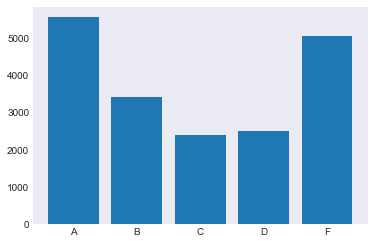

In [159]:
# Create a bar chart for Letter_Grade and Number of Deaths
x_bar = merge_census_law["Letter_Grade"]
y_bar = merge_census_law["Number of Deaths"]
plt.bar(x_bar, y_bar)

In [ ]:
gun_school_df.head()

In [ ]:
gun_raw_df.head()

In [ ]:
merge1 = gun_raw_df.merge(gun_school_df, how='outer', on='state')
merge1.head()

In [ ]:
merge2 = merge1.merge(gun_law_df, how='outer', on='state')
merge2.head()

In [ ]:
gun_dataframe = merge2.merge(gun_mental_df, how='outer', on='state')

gun_dataframe = gun_dataframe.rename(columns={"state": "State_Name"
                                      })


gun_dataframe.head()

In [ ]:
gun_census_df = gun_dataframe.merge(census_pd, how='outer', on='State_Name')
gun_census_df.head()

In [ ]:
gun_census = gun_census_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
gun_census.head()

In [ ]:
# Merge gun_census with state_summary on State_Name
gun_census_deaths = gun_census.merge(state_summary, how = 'outer', on = 'State_Name')
gun_census_deaths.head()

In [ ]:
# Drop DC because we don't have a lot of data for it
gun_census_deaths.drop([50])

In [ ]:
x_axis = gun_census_deaths["Population"]/gun_census_deaths["Number of Incidents"]
y_axis = gun_census_deaths["Unemployment Rate"]

plt.scatter(x_axis, y_axis)

In [ ]:
x_axis = gun_census_deaths["Population"]/gun_census_deaths["Number of Incidents"]
y_axis = gun_census_deaths["expenditure_per_capita"]

plt.scatter(x_axis, y_axis)

In [ ]:
y_axis = gun_census_deaths["Number of Incidents"]
x_axis = gun_census_deaths["Population"]


plt.scatter(x_axis, y_axis)